In [ ]:
!nvidia-smi

Thu Sep 10 09:15:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd

/content


In [3]:
!ls

drive  sample_data


In [ ]:
cd drive/

[Errno 2] No such file or directory: 'drive/'
/content


In [ ]:
#!pip uninstall torch torchvision

Uninstalling torch-1.6.0:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.6/dist-packages/caffe2/*
    /usr/local/lib/python3.6/dist-packages/torch-1.6.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/torch/*
Proceed (y/n)? n
Uninstalling torchvision-0.7.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/torchvision-0.7.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/torchvision/*
Proceed (y/n)? n


In [4]:
#Install Pytorch

!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 21kB/s 
     |████████████████████████████████| 6.7MB 54.3MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-vppgpsn3
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-vppgpsn3
     |████████████████████████████████| 645kB 9.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-cp37-none-any.whl size=63295 sha256=91ce809abc3dac9f58f3d78bcd60f2a2d4f5d258f35d665e4df46b7795c26c97
  Stored in directory: 

'1.5.1+cu101'

In [5]:
# install detectron2:
#!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.9MB 1.9MB/s 


In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [11]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sample1", {}, "/content/drive/MyDrive/data/arial_view.json", "/content/drive/MyDrive/data/images")

In [13]:
sample_metadata = MetadataCatalog.get("sample1")
dataset_dicts = DatasetCatalog.get("sample1")

WARNING [04/29 09:50:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/29 09:50:42 d2.data.datasets.coco]: Loaded 63 images in COCO format from /content/drive/MyDrive/data/arial_view.json


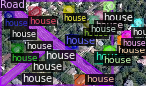

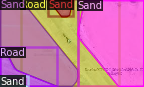

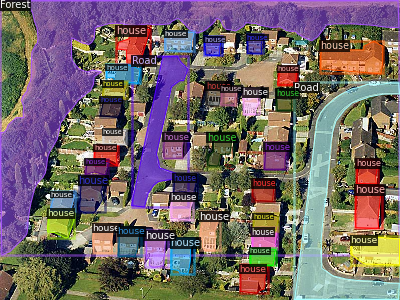

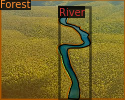

In [14]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [15]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 11975, done.
remote: Counting objects: 100% (638/638), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 11975 (delta 356), reused 579 (delta 335), pack-reused 11337
Receiving objects: 100% (11975/11975), 4.87 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (8636/8636), done.


In [33]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("sample1",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # 3 classes (Person, Helmet, Car)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/29 14:59:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (6, 256, 1, 1) 

[04/29 14:59:11 d2.engine.train_loop]: Starting training from iteration 0
[04/29 14:59:17 d2.utils.events]:  eta: 0:05:07  iter: 19  total_loss: 3.301  loss_cls: 1.47  loss_box_reg: 0.5603  loss_mask: 0.6841  loss_rpn_cls: 0.3751  loss_rpn_loc: 0.1468  time: 0.3103  data_time: 0.0109  lr: 0.00039962  max_mem: 9665M
[04/29 14:59:24 d2.utils.events]:  eta: 0:04:59  iter: 39  total_loss: 2.55  loss_cls: 0.8445  loss_box_reg: 0.8244  loss_mask: 0.6151  loss_rpn_cls: 0.1127  loss_rpn_loc: 0.08418  time: 0.3114  data_time: 0.0204  lr: 0.00079922  max_mem: 9665M
[04/29 14:59:30 d2.utils.events]:  eta: 0:04:54  iter: 59  total_loss: 2.415  loss_cls: 0.7407  loss_box_reg: 0.7892  loss_mask: 0.5315  loss_rpn_cls: 0.08719  loss_rpn_loc: 0.1004  time: 0.3123  data_time: 0.0045  lr: 0.0011988  max_mem: 9665M
[04/29 14:59:36 d2.utils.events]:  eta: 0:04:45  iter: 79  total_loss: 2.007  loss_cls: 0.651  loss_box_reg: 0.7763  loss_mask: 0.4602  loss_rpn_cls: 0.05209  loss_rpn_loc: 0.08726  time: 0.311

In [34]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("sample1", )
predictor = DefaultPredictor(cfg)

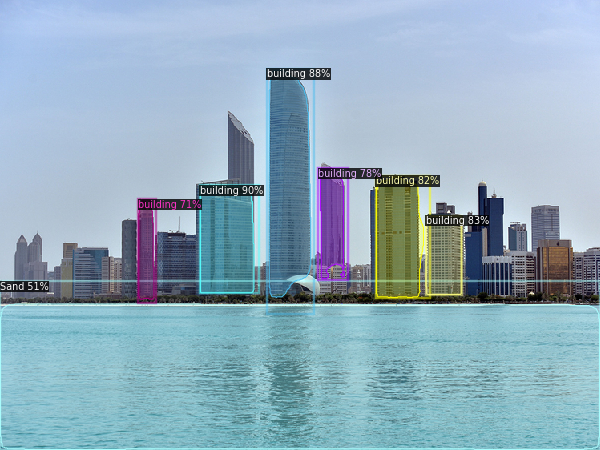

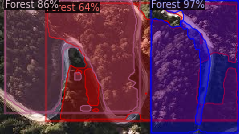

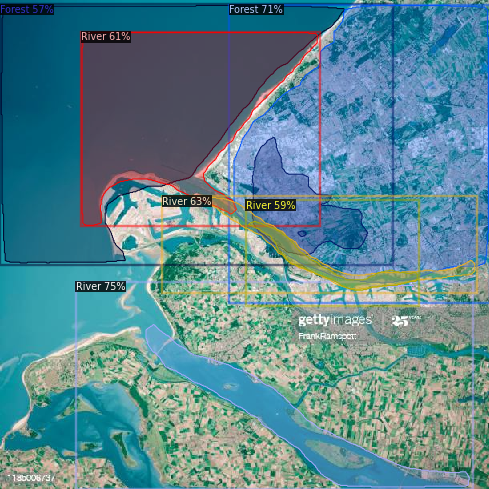

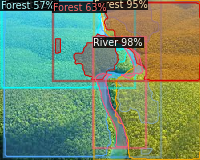

In [35]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])